In [2]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [15]:
#cancer_df = pd.read_csv('haberman.csv', header=None, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])
#print(cancer_df.head())

cancer_df = pd.read_csv('haberman.csv')
print(cancer_df.head())
print(cancer_df.info())
print(cancer_df.describe())



   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None
              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000
Number of rows: 306
Number of columns: 4
Columns: age, year, nodes, status
Target v

In [6]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 4 columns):
age                              307 non-null object
year_of_treatment                307 non-null object
positive_lymph_nodes             307 non-null object
survival_status_after_5_years    307 non-null object
dtypes: object(4)
memory usage: 9.7+ KB
None


In [7]:
print(cancer_df.describe())

        age year_of_treatment positive_lymph_nodes  \
count   307               307                  307   
unique   50                13                   32   
top      52                58                    0   
freq     14                36                  136   

       survival_status_after_5_years  
count                            307  
unique                             3  
top                                1  
freq                             225  


In [16]:
print("Number of rows: " + str(cancer_df.shape[0]))
print("Number of columns: " + str(cancer_df.shape[1]))
print("Columns: " + ", ".join(cancer_df.columns))

print("Target variable distribution")
print(cancer_df.iloc[:,-1].value_counts())
print("*"*50)
print(cancer_df.iloc[:,-1].value_counts(normalize = True))

Number of rows: 306
Number of columns: 4
Columns: age, year, nodes, status
Target variable distribution
1    225
2     81
Name: status, dtype: int64
**************************************************
1    0.735294
2    0.264706
Name: status, dtype: float64


In [17]:
cancer_df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


The age of the patients vary from 30 to 83 with the median of 52.
Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes
The dataset contains only a small number of records (306).
The target column is imbalanced with 73% of values are 'yes'




* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points 
lie within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group

/Users/Amrita/Documents/MLALGO/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


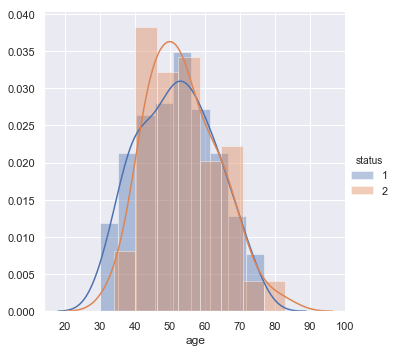

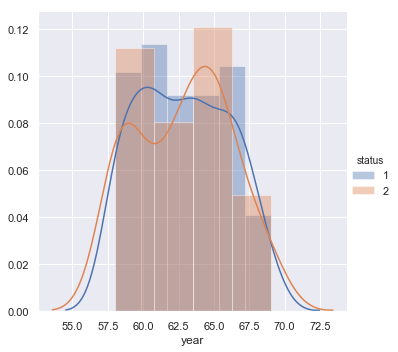

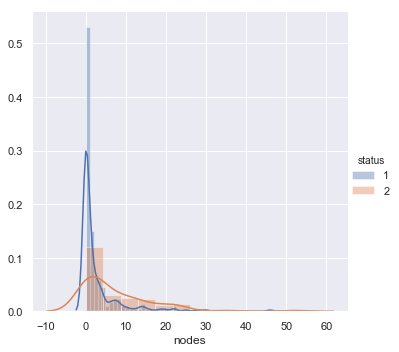

In [19]:
#Distribution plot
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    fg = sns.FacetGrid(cancer_df, hue='status', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

CDF
The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.


********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


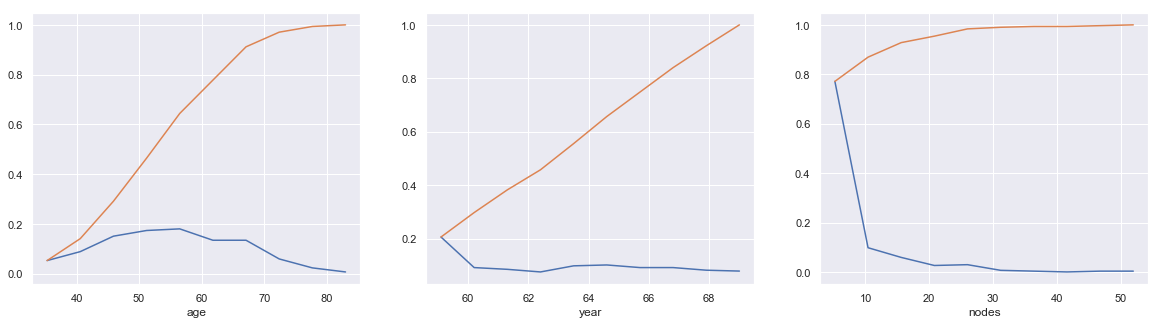

In [21]:
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(cancer_df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

 Box Plots

Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1


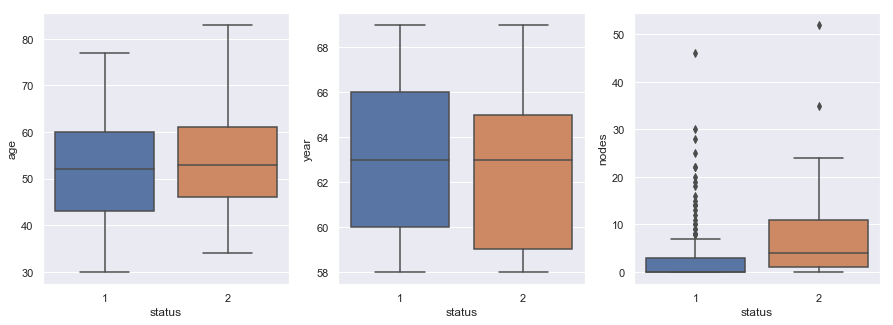

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    sns.boxplot( x='status', y=feature, data=cancer_df, ax=axes[idx])
plt.show()  

#5.4 Violin Plots

Violin plot is the combination of box plot and probability density function.


/Users/Amrita/Documents/MLALGO/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


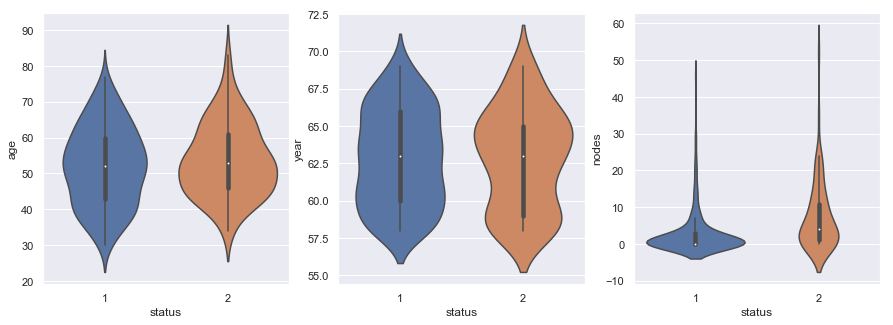

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=cancer_df, ax=axes[idx])
plt.show()

In [ ]:
Observations
The number of positive lymph nodes of the survivors is highly densed from 0 to 5. 
Almost 80% of the patients have less than or equal to 5 positive lymph nodea. 
The patients treated after 1966 have the slighlty higher chance to surive that the rest. 
    The patients treated before 1959 have the slighlty lower chance to surive that the rest. 

Multivariate analysis
# pair plot
"""
Pair plot in seaborn plots the scatter plot between every two data columns in a given dataframe.
It is used to visualize the relationship between two variables
"""

/Users/Amrita/Documents/MLALGO/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Amrita/Documents/MLALGO/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Amrita/Documents/MLALGO/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/Amrita/Documents/MLALGO/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encounte

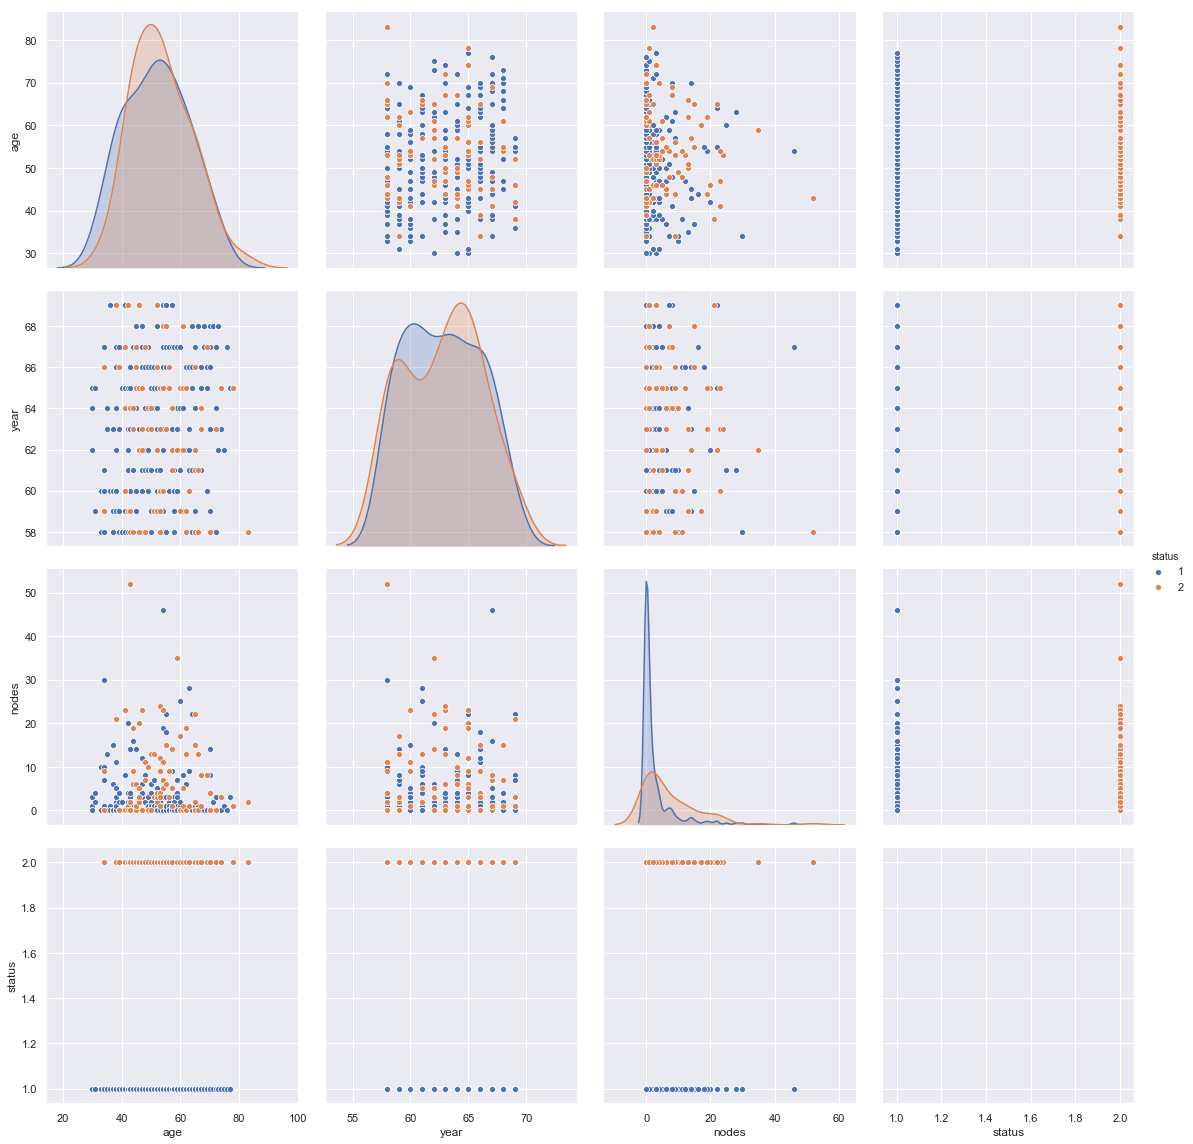

In [28]:
sns.pairplot(cancer_df, hue='status', height=4)
plt.show()

By scattering the data points between year_of_treatment and positive_lymph_nodes, we can see the better seperation between the two clases than other scatter plots.